## Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Dice

In [2]:
# Generate our dice
dice = np.arange(3, 13)
dice

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

## First Update

In [3]:
# Prior: Each dice is equally as likely to be selected
prior = [1 / len(dice) for _ in np.arange(len(dice))]
prior

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

In [4]:
# Define first roll and compute the likelihood of this roll
roll = 1
likelihood1 = [1 / i if i >= roll else 0 for i in dice]
likelihood1

[0.3333333333333333,
 0.25,
 0.2,
 0.16666666666666666,
 0.14285714285714285,
 0.125,
 0.1111111111111111,
 0.1,
 0.09090909090909091,
 0.08333333333333333]

In [5]:
# Update our belief using prior and likelihood
posterior = np.array(likelihood1) * np.array(prior)

In [6]:
# Normalise our prosterior
list(posterior / sum(posterior))

[0.20791611349879613,
 0.15593708512409712,
 0.1247496680992777,
 0.10395805674939806,
 0.08910690578519834,
 0.07796854256204856,
 0.06930537116626538,
 0.06237483404963885,
 0.05670439459058077,
 0.05197902837469903]

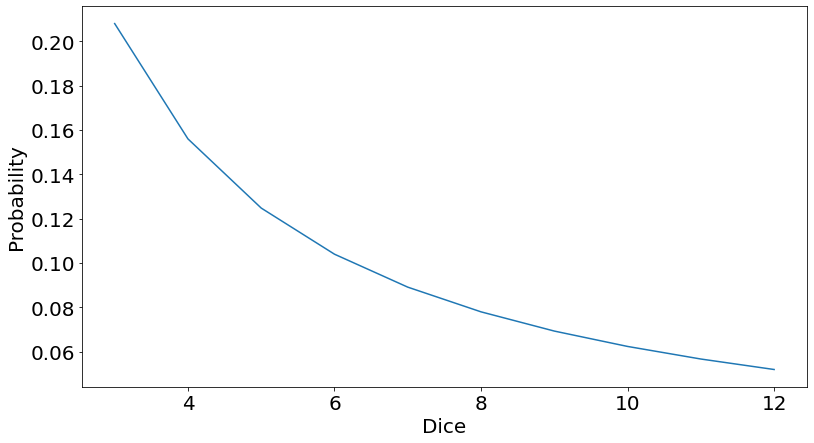

In [7]:
# Plot the probability distribution
plt.figure(figsize=(13, 7))
plt.xlabel("Dice", fontsize=20)
plt.ylabel("Probability", fontsize=20)
plt.plot(dice, list(posterior / sum(posterior)))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("plot.png")
plt.show()

In [25]:
# Get die with highest probability
dice[np.argmax(posterior)]

3

## Second Update

In [8]:
# Compute likelihood of second roll
roll = 5
likelihood2 = [1 / i if i >= roll else 0 for i in dice]
likelihood2

[0,
 0,
 0.2,
 0.16666666666666666,
 0.14285714285714285,
 0.125,
 0.1111111111111111,
 0.1,
 0.09090909090909091,
 0.08333333333333333]

In [9]:
# Update our posterior
posterior = posterior * np.array(likelihood2)

In [10]:
list(posterior / sum(posterior))

[0.0,
 0.0,
 0.2829544144262495,
 0.1964961211293399,
 0.14436449715624972,
 0.1105290681352537,
 0.08733160939081774,
 0.07073860360656238,
 0.05846165587319205,
 0.049124030282334974]

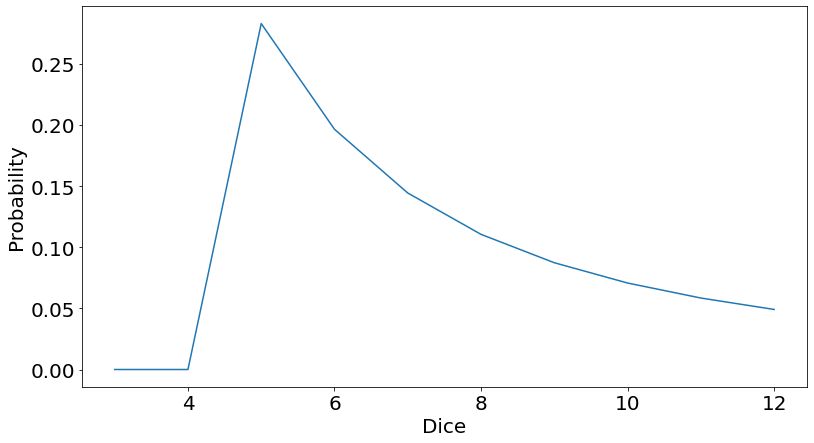

In [12]:
# Plot the probability distribution
plt.figure(figsize=(13, 7))
plt.xlabel("Dice", fontsize=20)
plt.ylabel("Probability", fontsize=20)
plt.plot(dice, list(posterior / sum(posterior)))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("plot.png")
plt.show()

In [30]:
# Get die with highest probability
dice[np.argmax(posterior)]

5

## Generic Function

In [13]:
def bayesian_dice_updating(data, dice):
    """Compute the posterior distribution for given dice and data.

    :param data: The numbers that have been rolled from the dice
    :type data: list, np.array

    :param dice: The range of dices where the number represents
                 the maximum value that die can take.
    :type dice: list, np.array

    :returns: Posterior distribution of the dice given the data
    :rtype: list

    """

    prior = [1 / len(dice) for _ in np.arange(len(dice))]

    posterior = prior

    for roll in data:
        likelihood = [1 / i if i >= roll else 0 for i in dice]
        posterior = np.array(likelihood) * np.array(posterior)

    return list(posterior / sum(posterior))

In [14]:
# Generate our dice
dice = np.arange(1, 51)

In [15]:
# Some rolls
data = [4, 6, 9]

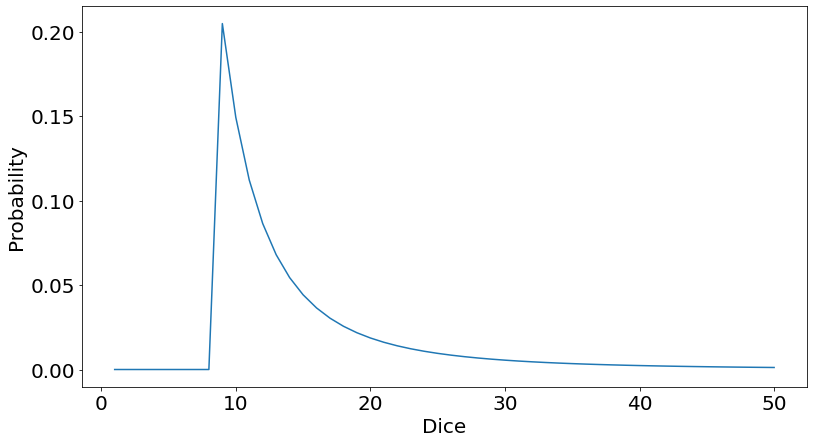

In [17]:
# Plot the probability distribution
plt.figure(figsize=(13, 7))
plt.xlabel("Dice", fontsize=20)
plt.ylabel("Probability", fontsize=20)
plt.plot(dice, bayesian_dice_updating(data, dice))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("plot.png")
plt.show()

In [35]:
# Get die with highest probability
dice[np.argmax(bayesian_dice_updating(data, dice))]

9